In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\victo\Documents\DSML\tensorflow\kaggledge\Instruções
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\notebooka2717e26dd - Copy.ipynb
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\notebooka2717e26dd.ipynb
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\output.csv
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\output1.csv
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\output2.csv
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\Untitled.ipynb
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\.ipynb_checkpoints\notebooka2717e26dd - Copy-checkpoint.ipynb
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\.ipynb_checkpoints\notebooka2717e26dd-checkpoint.ipynb
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\.ipynb_checkpoints\Untitled-checkpoint.ipynb
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Bishop\00000000.JPG
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Bishop\00000

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import random

In [3]:
cv2.__version__

'4.4.0'

In [4]:
dataset_dir = os.listdir(r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset')

In [5]:
dataset_dir

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [6]:
test_imgs = sorted([r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\eval\{}'.format(i) for i in os.listdir(r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\eval')])

In [7]:
test_imgs

['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\eval\\0.jpg',
 'C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\eval\\1.jpg',
 'C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\eval\\10.jpg',
 'C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\eval\\11.jpg',
 'C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\eval\\12.jpg',
 'C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\eval\\13.png',
 'C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\eval\\14.jpg',
 'C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\eval\\15.jpg',
 'C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\eval\\16.png',
 'C:\\Users\\victo\\Documents\\DSML\\te

In [8]:
train_Bishop = sorted([r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Bishop/{}'.format(i) for i in os.listdir(r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Bishop')])
train_Bishop1= []
for i in train_Bishop:
    train_Bishop1.append([i,'Bishop'])
train_King = sorted([r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\King/{}'.format(i) for i in os.listdir(r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\King')])
train_King1= []
for i in train_King:
    train_King1.append([i,'King'])
train_Queen = sorted([r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Queen/{}'.format(i) for i in os.listdir(r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Queen')])
train_Queen1= []
for i in train_Queen:
    train_Queen1.append([i,'Queen'])
train_Rook = sorted([r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Rook/{}'.format(i) for i in os.listdir(r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Rook')])
train_Rook1= []
for i in train_Rook:
    train_Rook1.append([i,'Rook'])
train_Pawn = sorted([r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Pawn/{}'.format(i) for i in os.listdir(r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Pawn')])
train_Pawn1= []
for i in train_Pawn:
    train_Pawn1.append([i,'Pawn'])
train_Knight = sorted([r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Knight\{}'.format(i) for i in os.listdir(r'C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Knight')])
train_Knight1= []
for i in train_Knight:
    train_Knight1.append([i,'Knight'])

In [9]:
train_Knight1

[['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Knight\\00000000.jpg',
  'Knight'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Knight\\00000001.jpg',
  'Knight'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Knight\\00000002.jpg',
  'Knight'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Knight\\00000005.png',
  'Knight'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Knight\\00000006.jpg',
  'Knight'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Knight\\00000008.jpg',
  'Knight'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Knight\\00000009.jpg',
  'Knight'],
 ['C:\\Users\\victo\\Documents\\DS

In [10]:
train_imgs = train_Bishop1 + train_King1 + train_Knight1 + train_Pawn1 + train_Queen1 + train_Rook1

In [11]:
random.shuffle(train_imgs)
train_imgs

[['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Rook/00000103.png',
  'Rook'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Pawn/00000005.jpg',
  'Pawn'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Bishop/00000062.jpg',
  'Bishop'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Rook/00000098.png',
  'Rook'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Queen/00000036.jpg',
  'Queen'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\King/00000088.jpg',
  'King'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Bishop/00000011.jpg',
  'Bishop'],
 ['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge

In [12]:
classes = dataset_dir

In [13]:
classes

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [14]:
for i in train_imgs:
    print(i)
    #for i in range(len(train_imgs[0])):
        #print(i)

['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Rook/00000103.png', 'Rook']
['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Pawn/00000005.jpg', 'Pawn']
['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Bishop/00000062.jpg', 'Bishop']
['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Rook/00000098.png', 'Rook']
['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Queen/00000036.jpg', 'Queen']
['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\King/00000088.jpg', 'King']
['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-edge\\dataset\\Bishop/00000011.jpg', 'Bishop']
['C:\\Users\\victo\\Documents\\DSML\\tensorflow\\kaggledge\\input\\2-competicao-de-ia-e

In [15]:
import tensorflow as tf

In [16]:
nrows = 150
ncolumns = 150
channels = 3

def rpi(train):
    training = []
    output = []
    output_empty = [0 for _ in range(len(classes))]
    for image in train:
        for i in range(len(image[0])):
            img = (cv2.resize(cv2.imread(image[0],cv2.IMREAD_COLOR),(300,300),interpolation=cv2.INTER_CUBIC))
        for i in range(len(image[1])):
            output_row = list(output_empty)
            output_row[classes.index(image[1])] = 1
        training.append([img,output_row])
        
    random.shuffle(training)
    training = np.array(training)
    
    X = list(training[:,0])
    y = list(training[:,1])
            
    return X,y


In [17]:
for image in train_imgs:
    print(image[0],image[1])

C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Rook/00000103.png Rook
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Pawn/00000005.jpg Pawn
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Bishop/00000062.jpg Bishop
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Rook/00000098.png Rook
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Queen/00000036.jpg Queen
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\King/00000088.jpg King
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Bishop/00000011.jpg Bishop
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Knight\00000173.jpg Knight
C:\Users\victo\Documents\DSML\tensorflow\kaggledge\input\2-competicao-de-ia-edge\dataset\Q

In [18]:
X, y = rpi(train_imgs)

In [19]:
y

[[0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0,

In [20]:
X

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[ 36,  18,  17],
         [ 36,  18,  17],
         [ 36,  18,  17],
         ...,
         [ 36,  18,  17],
         [ 36,  18,  17],
         [ 36,  18,  17]],
 
        [[ 36,  18,  17],
         [ 36,  18,  17],
         [ 36,  18,  17],
         ...,
         [ 36,  18,  17],
         [ 36,  18,  17],
         [ 36,  18,  17]],
 
        [[ 36,  18,  17],
         [ 36,  18,  17],
         [ 36,  18,  17],
         ...,
         [ 36,  18,  17],
  

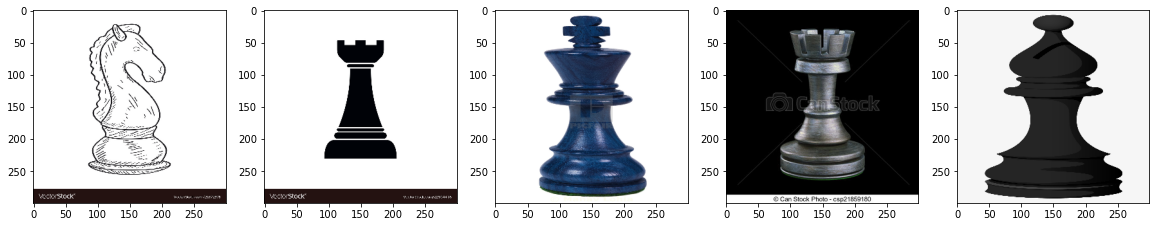

In [21]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns+1,columns,i+1)
    plt.imshow(X[i])

In [22]:
X = np.array(X)
y= np.array(y)
print(X.shape,y.shape)

(499, 300, 300, 3) (499, 6)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [24]:
X_train.shape

(374, 300, 300, 3)

In [25]:
y_train.shape

(374, 6)

In [26]:
ntrain = len(X_train)
nval = len(X_test)

In [29]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

ModuleNotFoundError: No module named 'keras'

In [ ]:
import keras
keras.__version__

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(4,(3, 3),activation='relu',input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(8,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(len(classes),activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow(X_train, y_train,batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

history = model.fit_generator(train_generator,
                             steps_per_epoch=ntrain // 32,
                             epochs = 32,
                             validation_data = test_generator,
                             validation_steps = nval//32)

In [ ]:
model.summary()

In [ ]:
def rpit(test):
    validate = []
    for image in test:
        for i in range(len(test)):
            validate.append(cv2.resize(cv2.imread(test[i],cv2.IMREAD_COLOR),(nrows,ncolumns),interpolation=cv2.INTER_CUBIC))
    return validate

In [ ]:
validate = rpit(test_imgs)

In [ ]:
len(validate)

In [ ]:
validation = np.array(validate)

In [ ]:
pred = model.predict(test_datagen.flow(validation))
pred

In [ ]:
pred[0]

In [ ]:
pred[2]

In [ ]:
classes[np.argmax(pred[6])]

In [ ]:
plt.figure(figsize=(20,10))
columns = 30
plt.imshow(validate[6])

In [ ]:
df = pd.DataFrame(data=pred[:51])

In [ ]:
new_col = [i for i in range(len(test_imgs))]

In [ ]:
df.insert(loc=0,column='id',value=new_col)

In [ ]:
df.columns = ['Id','class_bishop_conf','class_king_conf','class_knight_conf','class_pawn_conf','class_queen_conf','class_rook_conf']

In [ ]:
df

In [ ]:
df.set_index('Id',drop=True,inplace=True)

In [ ]:
df

In [ ]:
df.to_csv('output2.csv')